# Intro to Stochastic Approximation


In this tutorial, you will be exposed to the basics of stochastic approximation (SA) by investigating its applications to optimization.

Consider the unconstrained optimization problem: $\Gamma(\theta^*) = \min_\theta \Gamma(\theta)$, where $\Gamma: \mathbb{R}^d \to \mathbb{R}_+$. Provided the function $\Gamma$ is $C^1$, a necessary condition for optimality is $\nabla\Gamma(\theta^*) =0$. The gradient descent ODE is defined by 

$$\frac{d}{dt}{\vartheta} = - \nabla\Gamma(\vartheta)$$

Now, suppose that we do not have access to the values of $\Gamma$, but instead we can measure an unbiased version of this function corrupted by noise for each $\theta \in \mathbb{R}^d$: $\Gamma(\theta) = \mathbb{E}[\widetilde{\Gamma}(\theta,\Phi)]$. An approximation of the gradient descent ODE can be realized as SA, with average vector field equal to

$$\bar{f}(\theta) = - \nabla_\theta \mathbb{E}[\widetilde{\Gamma}(\theta,\Phi)] = \mathbb{E}[-\nabla_\theta \widetilde{\Gamma}(\theta,\Phi)] = \mathbb{E}[f(\theta,\Phi)] $$

in which the exchange between gradient and expectation is justified under mild assumptions.

Suppose moreover that we are given samples $\mathbf{\Phi} = \{\Phi_n: n\geq 1 \}$ for which $\Phi_n \overset{d}{\to} \Phi$ as $n \to \infty$ (convergence in distribution) and denote $f_n(\theta) = -\nabla_\theta \widetilde{\Gamma}(\theta,\Phi_n)$. The stochastic gradient descent algorithm is an instance of SA:

$$\theta_{n+1} = \theta_{n} + \alpha_{n+1} f_{n+1}(\theta_n)$$

Throughout the remainder of this tutorial, we will consider the scalar-valued objective function: $\Gamma(\theta) = \theta^4 - \cos(4\theta)+1$ and restrict to step-size choices of the form $\alpha_n = n^{-\rho}$, $\rho \in (1/2,1)$. Moreover, for each $n$, we will use $f_n(\theta) = -\nabla \Gamma(\theta) + W_n$, in which $\{W_n\}$ is i.i.d. with $W_n \sim N(0,1)$.


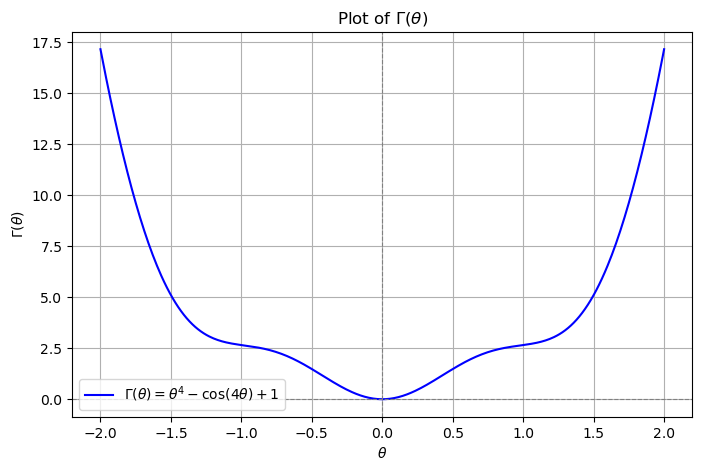

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gamma(theta):
    return theta**4 - np.cos(4*theta) + 1

# Define the range of theta values
theta = np.linspace(-2, 2, 400)  # Adjust range as needed

# Compute function values
gamma_values = gamma(theta)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(theta, gamma_values, label=r'$\Gamma(\theta) = \theta^4 - \cos(4\theta) + 1$', color='b')
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\Gamma(\theta)$')
plt.title(r'Plot of $\Gamma(\theta)$')
plt.legend()
plt.grid(True)
plt.show()

## Algorithm Design

Recall from lecture the following conditions for ensuring sucess of SA algorithms:
 - Lipschitz continuity of $\bar{f}$
 - Asymptotic stability of the mean flow ODE $\frac{d}{dt}\vartheta = \bar{f}(\vartheta)$ to $\theta^*$
 - Huwirtz linearization of $\bar{f}$ at the equilibrium, that is, all eigenvalues of $A^* : = \partial_\theta \bar{f}(\theta^*)$ lie in the strict left half plane in $\mathbb{C}$
 - $\bar{f}(\theta^*) = 0$

$\textbf{(a)}$ Are the above conditions satisfied for our objective function? If not, how can you modify the algorithm so that they are satisfied? 
$\textbf{Hint:}$ you should be able to find a function $\epsilon(\theta)$ such that all of above conditions hold with the modified gradient $ \bar{f}(\theta) = -\epsilon(\theta) \nabla\Gamma(\theta)$.


$\color{red}{\textbf{Answer:}}$ The function $\epsilon(\theta) = \frac{1}{1+\theta^2}$ leads to an algorithm that satisfies the assumptions

## Algorithm Performance

As described in lecture, we expect the Central Limit Theorem (CLT) to hold for consistent SA algorithms, that is, for algorithms in which $\theta_n \to \theta^*$ as $n \to \infty$ consistently. The CLT tells us that the scaled error convergences in distribution to a Gaussian random variable: $\sqrt{\alpha^{-1}_{n+1}} (\theta_n - \theta^*) \overset{d}{\to} N(0,\Sigma_\theta)$, in which the $\textit{asymptotic covariance}$ admits the lower bound:

$$\Sigma_\theta \geq \Sigma^* := [A^*]^{-2} \Sigma_W\, , \qquad \Sigma_W := var(W_n)$$

It is well known that this lower bound is achieved through the incorporation of a partial average of the sequence of estimates. For each $n$, the Polyak-Ruppert (PR) averaged estimate is:

$$\theta^{\text{\sf PR}}_N = \frac{1}{N-N_0+1}\sum^{N}_{k=N_0} \theta_k \, , \qquad N \geq N_0$$

in which the interval $\{0, \cdots , N_0\}$ is known as the $\textit{burn-in}$ period.

The PR averaged scaled error not only leads to optimal CLT variance, but also speeds up convergence rates: for any $\rho \in (1/2,1)$, we have $\sqrt{N} (\theta^{\text{\sf PR}}_N - \theta^*) \overset{d}{\to} N(0,\Sigma^*)$.

However, you can never know in advance the optimal variance $\Sigma^*$. In practice, you must perform multiple runs to obtain final estimates $\{\theta^{\text{\sf PR}^i}_N : 1 \leq  i \leq  M \}$ for a fixed large value of $N$, and investigate the histograms of the scaled error.

$\textbf{(b)}$ Using your modified gradient, perform $M = 500$ independent runs of the following algorithm, with and without PR averaging for you choice of (large) runlength $N$:

$$\theta_{n+1} = \theta_{n} + \alpha_{n+1} [\bar{f}(\theta) + W_{n+1}]$$

For each of runs, sample the initial conditions $\theta^i_0$ uniformly from $[-20,20]$ and fix $\rho \in (1/2,1)$. Choose $N_0 \leq 0.2N$ so that  you are averaging at least $80\%$ of the run. Is your algorithm consistent?
$\textbf{Hint:}$ Partial code for this experiment is provided below. Complete the code below only at lines where you see the symbol: \*.\*




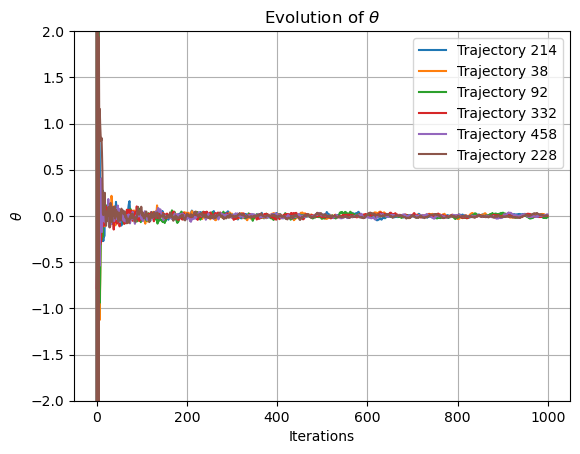

In [2]:
N=10**3
M=500
rho=0.8


thetaAll = np.zeros((N,M))
thetaAll[0,:] = np.random.uniform(-20, 20, M)
thetaPR = np.zeros((1,M))
AllNoise = np.random.normal(0,1,(N,M))

def get_fbar(theta):
    epsi = 1 / (1 + theta**2)
    grad_Gamma =  4 * theta**3 + 4 * np.sin(4 * theta)
    
    return grad_Gamma * epsi



for j in range(0,M):
    for i in range(1, N):
        This_alpha = 1 / (i ** rho)  
        This_fbar = get_fbar(thetaAll[i-1,j])
        thetaAll[i,j] = thetaAll[i-1,j] - This_alpha * (This_fbar + AllNoise[i,j])
    thetaPR[0,j] = np.mean(thetaAll[int(0.2*N):N,j])
    
    
#Plotting 
subset_indices = np.random.choice(M,min(6, M),False)
for ind in subset_indices:
    plt.plot(range(N), thetaAll[:, ind], label=f'Trajectory {ind+1}')
plt.xlabel('Iterations')
plt.ylabel(r'$\theta$')
plt.title(r'Evolution of $\theta$')
plt.ylim(-2, 2)
plt.legend()
plt.grid()
plt.show()


$\textbf{(c)}$ Plot histograms of the scaled errors $\{  \sqrt{N}  (\theta^{\text{\sf PR}^i}_N - \theta^*) : 1 \leq  i \leq  M \}$ and $\{  \sqrt{N}  (\theta^{i}_N - \theta^*) : 1 \leq  i \leq  M \}$ and comment in what you observe. 
$\textbf{Hint:}$ Partial code for this experiment is provided below. Complete the code below only at lines where you see the symbol: \*.\*

$\color{red}{\textbf{Answer:}}$ As expected from the SA theory, the histograms associated with PR averaging have lower variance. We expect the variance for histograms associated with unaveraged estimates to blow up as $N$ increases. This happens since there is not theory supporting the CLT for $\sqrt{N}  (\theta_N - \theta^*)$, only for $\sqrt{\alpha_{N}^{-1}}  (\theta_N - \theta^*)$

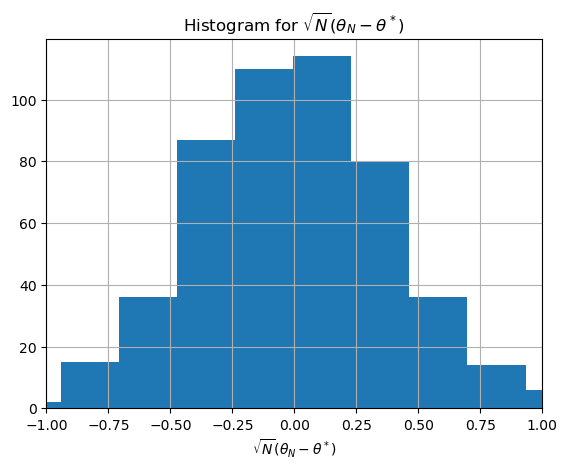

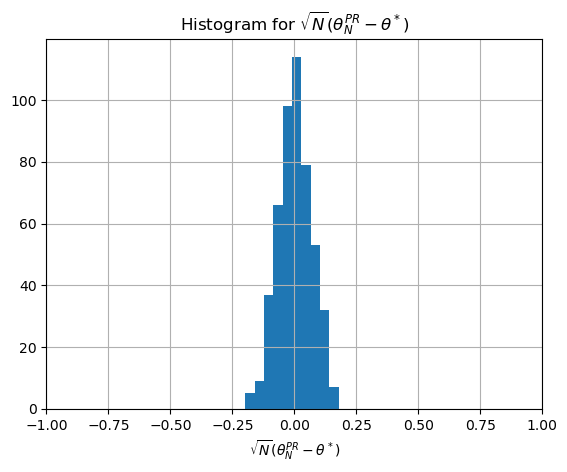

In [3]:
from IPython.display import display, Math


#Compute and plot histograms for the scaled error for \theta
plt.hist(np.sqrt((N))*thetaAll[-1,:])
plt.xlabel(r'$\sqrt{N}(\theta_N - \theta^*)$')
plt.title(r'Histogram for $\sqrt{N}(\theta_N - \theta^*)$')
plt.xlim([-1,1])
plt.grid()
plt.show()


#Compute and plot histograms for the scaled error for \thetaPR
plt.hist(np.sqrt(N)*thetaPR[0,:])
plt.xlabel(r'$\sqrt{N}(\theta^{PR}_N - \theta^*)$')
plt.title(r'Histogram for $\sqrt{N}(\theta^{PR}_N - \theta^*)$')
plt.xlim([-1,1])
plt.grid()
plt.show()



$\textbf{(d)}$ Compute the empirical variances for $\{  \sqrt{N}  (\theta^{\text{\sf PR}^i}_N - \theta^*) : 1 \leq  i \leq  M \}$ and $\{  \sqrt{\alpha^{-1}_N}  (\theta^{i}_N - \theta^*) : 1 \leq  i \leq  M \}$. How do they compare with the optimal CLT variance $\Sigma^*$?
$\textbf{Hint:}$ Partial code for this experiment is provided below. Complete the code below only at lines where you see the symbol: \*.\*

$\color{red}{\textbf{Answer:}}$ As expected from SA theory, the empirical variance of the scaled error for PR averaged estimates is much closer to the optimal asymptotic covariance when compared to the empirical variance of the scaled error for estimates without averaging.

In [4]:
#Compute the empirical variance of the scaled error for \theta
display(Math(r"\text{The empirical variance for } \sqrt{\alpha_{N}^{-1}}(\theta_N - \theta^*) \text{ is}"))
print(np.var(np.sqrt((N)**rho)*(thetaAll[-1,:] -  np.mean(thetaAll[-1,:]) )))

#Compute the empirical variance of the scaled error for \thetaPR
display(Math(r"\text{The empirical variance for } \sqrt{N}(\theta^{PR}_N - \theta^*) \text{ is}"))
print(np.var(np.sqrt((N))*(thetaPR[0,:]) - np.mean(thetaPR[0,:])))

#Compute the optimal asymptotic variance
display(Math(r"\text{The predicted optimal CLT variance is}"))
print(1/256)
#A^* is 16 and var(Wn) is 1

<IPython.core.display.Math object>

0.03802629431376099


<IPython.core.display.Math object>

0.004484514463883991


<IPython.core.display.Math object>

0.00390625


## Curse of Variance

$\textbf{(d)}$ Suppose that the SA algorithm is now ran with $f_n(\theta) = -\epsilon(\theta)\nabla \Gamma(\theta) + W_n$ with $W_{n} = \beta^2 W_{n-1} + \sqrt{1-\beta^2} W^\circ_{n}$, in which $\beta>0$ is fixed and $W^\circ_{n} \sim N(0,1)$ for each $n$. 
Re-run your algorithm for different values of $\beta$ and discuss your findings. What value of $\beta$ would lead the asymptotic variance to be minimized?
$\color{red}{\textbf{Answer:}}$ $\beta \approx 0$


$\textbf{(e)}$ Suppose that the SA algorithm is now ran with $f_n(\theta) = -\epsilon(\theta)\nabla \Gamma(\theta) + W_n$ with $W_{n} = -\beta^2 W_{n-1} + \sqrt{1-\beta^2} W^\circ_{n}$, in which $\beta>0$ is fixed and $W^\circ_{n} \sim N(0,1)$ for each $n$. 
Re-run your algorithm for different values of $\beta$ and discuss your findings. What value of $\beta$ would lead the asymptotic variance to be minimized?
$\color{red}{\textbf{Answer:}}$ $\beta =1$